TEST GROUP A - ALDO

In [ ]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# --- Instalasi (Jalankan ini hanya jika pustaka belum terinstal) ---
# Jika Anda belum memiliki MNE, scikit-learn, atau pyedflib, hapus tanda '#' di bawah ini
# dan jalankan di terminal atau command prompt:
# pip install mne scikit-learn pyedflib

# --- Langkah 1: Memuat Data EDF dari Folder ---
# Tentukan jalur ke folder yang berisi file-file EDF.
edf_folder_paths = "Group A/Aldo/EEG18EDFCase"
try:
    # Mencari semua file .EDF di dalam folder
    edf_files = glob.glob(os.path.join(edf_folder_paths, "*.EDF"))
    
    # Memeriksa jika ada file yang ditemukan
    if not edf_files:
        print(f"Tidak ada file EDF ditemukan di: '{edf_folder_paths}'. Mohon periksa kembali jalurnya.")
    else:
        # Looping melalui setiap file EDF yang ditemukan
        for file_path in edf_files:
            # TEST  SECTION
            edf_file_path =  file_path

            try:
                # Membaca data EDF. preload=True memuat data ke memori.
                print(f"Membaca file: {edf_file_path}...")
                raw = mne.io.read_raw_edf(edf_file_path, preload=True)
                raw.set_montage('standard_1020', on_missing='ignore')
                
            except FileNotFoundError:
                print(f"File '{edf_file_path}' tidak ditemukan.")
                print("Membuat data EEG dummy untuk demonstrasi.")
                
                # Membuat data dummy untuk demonstrasi jika file tidak ada
                sfreq = 256  # Frekuensi sampling dalam Hz
                ch_names = ['Fp1', 'Fp2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'O1', 'O2']
                n_channels = len(ch_names)
                duration_s = 60  # Durasi dalam detik
                
                # Membuat sinyal sinus 10 Hz untuk simulasi kedipan mata
                t = np.arange(sfreq * duration_s) / sfreq
                eye_blink = np.sin(2 * np.pi * 10 * t) * 50e-6
                
                # Membuat data acak untuk simulasi aktivitas otak
                eeg_data = np.random.randn(n_channels, len(t)) * 10e-6
                
                # Menambahkan sinyal kedipan mata ke beberapa saluran
                eeg_data[0] += eye_blink  # Menambahkan kedipan mata ke Fp1
                eeg_data[1] += eye_blink  # Menambahkan kedipan mata ke Fp2

                info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
                raw = mne.io.RawArray(eeg_data, info)
                raw.set_montage('standard_1020')

            # --- Langkah 2: Pra-pemrosesan Data ---
            # Pra-pemrosesan penting untuk hasil ICA yang baik.
            # print("Melakukan pra-pemrosesan data...")
            # Menyaring data untuk menghilangkan drift DC dan noise frekuensi tinggi
            raw.filter(1., 40., fir_design='firwin')

            # Menghilangkan rata-rata (average) referensi EEG
            raw.set_eeg_reference('average', projection=True)

            # --- Langkah 3: Menyiapkan dan Menjalankan ICA ---
            # n_components: jumlah komponen independen yang akan diekstraksi
            # random_state: untuk hasil yang dapat direproduksi
            # print("Menjalankan ICA...")
            ica = ICA(n_components=5, random_state=97, method='fastica')
            ica.fit(raw)

            # --- Langkah 4: Visualisasi Hasil ICA ---
            # Memvisualisasikan komponen independen.
            # Komponen yang sering terlihat seperti kedipan mata (eye blink),
            # gerakan mata, atau kontraksi otot adalah artefak.
            # print("Membuat plot komponen ICA. Klik pada plot untuk melihat properti.")
            ica.plot_sources(raw, show_scrollbars=False)

            plt.show() # Tampilkan semua plot
            # print("Selesai. Skrip telah berjalan.")

# Handling error
except FileNotFoundError:
    print(f"Folder '{edf_folder_paths}' tidak ditemukan. Mohon periksa kembali jalurnya.")

TEST GROUP A - Arifah

In [ ]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# --- Instalasi (Jalankan ini hanya jika pustaka belum terinstal) ---
# Jika Anda belum memiliki MNE, scikit-learn, atau pyedflib, hapus tanda '#' di bawah ini
# dan jalankan di terminal atau command prompt:
# pip install mne scikit-learn pyedflib

# --- Langkah 1: Memuat Data EDF dari Folder ---
# Tentukan jalur ke folder yang berisi file-file EDF.
edf_folder_paths = "Group A\Arifah\EEG18EDFCase"
try:
    # Mencari semua file .EDF di dalam folder
    edf_files = glob.glob(os.path.join(edf_folder_paths, "*.EDF"))
    
    # Memeriksa jika ada file yang ditemukan
    if not edf_files:
        print(f"Tidak ada file EDF ditemukan di: '{edf_folder_paths}'. Mohon periksa kembali jalurnya.")
    else:
        # Looping melalui setiap file EDF yang ditemukan
        for file_path in edf_files:
            # TEST  SECTION
            edf_file_path =  file_path

            try:
                # Membaca data EDF. preload=True memuat data ke memori.
                print(f"Membaca file: {edf_file_path}...")
                raw = mne.io.read_raw_edf(edf_file_path, preload=True)
                raw.set_montage('standard_1020', on_missing='ignore')
                
            except FileNotFoundError:
                print(f"File '{edf_file_path}' tidak ditemukan.")
                print("Membuat data EEG dummy untuk demonstrasi.")
                
                # Membuat data dummy untuk demonstrasi jika file tidak ada
                sfreq = 256  # Frekuensi sampling dalam Hz
                ch_names = ['Fp1', 'Fp2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'O1', 'O2']
                n_channels = len(ch_names)
                duration_s = 60  # Durasi dalam detik
                
                # Membuat sinyal sinus 10 Hz untuk simulasi kedipan mata
                t = np.arange(sfreq * duration_s) / sfreq
                eye_blink = np.sin(2 * np.pi * 10 * t) * 50e-6
                
                # Membuat data acak untuk simulasi aktivitas otak
                eeg_data = np.random.randn(n_channels, len(t)) * 10e-6
                
                # Menambahkan sinyal kedipan mata ke beberapa saluran
                eeg_data[0] += eye_blink  # Menambahkan kedipan mata ke Fp1
                eeg_data[1] += eye_blink  # Menambahkan kedipan mata ke Fp2

                info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
                raw = mne.io.RawArray(eeg_data, info)
                raw.set_montage('standard_1020')

            # --- Langkah 2: Pra-pemrosesan Data ---
            # Pra-pemrosesan penting untuk hasil ICA yang baik.
            # print("Melakukan pra-pemrosesan data...")
            # Menyaring data untuk menghilangkan drift DC dan noise frekuensi tinggi
            raw.filter(1., 40., fir_design='firwin')

            # Menghilangkan rata-rata (average) referensi EEG
            raw.set_eeg_reference('average', projection=True)

            # --- Langkah 3: Menyiapkan dan Menjalankan ICA ---
            # n_components: jumlah komponen independen yang akan diekstraksi
            # random_state: untuk hasil yang dapat direproduksi
            # print("Menjalankan ICA...")
            ica = ICA(n_components=5, random_state=97, method='fastica')
            ica.fit(raw)

            # --- Langkah 4: Visualisasi Hasil ICA ---
            # Memvisualisasikan komponen independen.
            # Komponen yang sering terlihat seperti kedipan mata (eye blink),
            # gerakan mata, atau kontraksi otot adalah artefak.
            # print("Membuat plot komponen ICA. Klik pada plot untuk melihat properti.")
            ica.plot_sources(raw, show_scrollbars=False)

            plt.show() # Tampilkan semua plot
            # print("Selesai. Skrip telah berjalan.")

# Handling error
except FileNotFoundError:
    print(f"Folder '{edf_folder_paths}' tidak ditemukan. Mohon periksa kembali jalurnya.")

Group A - Test Atsna

<>:15: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Latifatul Istianah\AppData\Local\Temp\ipykernel_9248\804787523.py:15: SyntaxWarning: invalid escape sequence '\A'
  edf_folder_paths = "Group A\Atsna\EEG18EDFCase"


Membaca file: Group A\Atsna\EEG18EDFCase\0000532.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000532.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

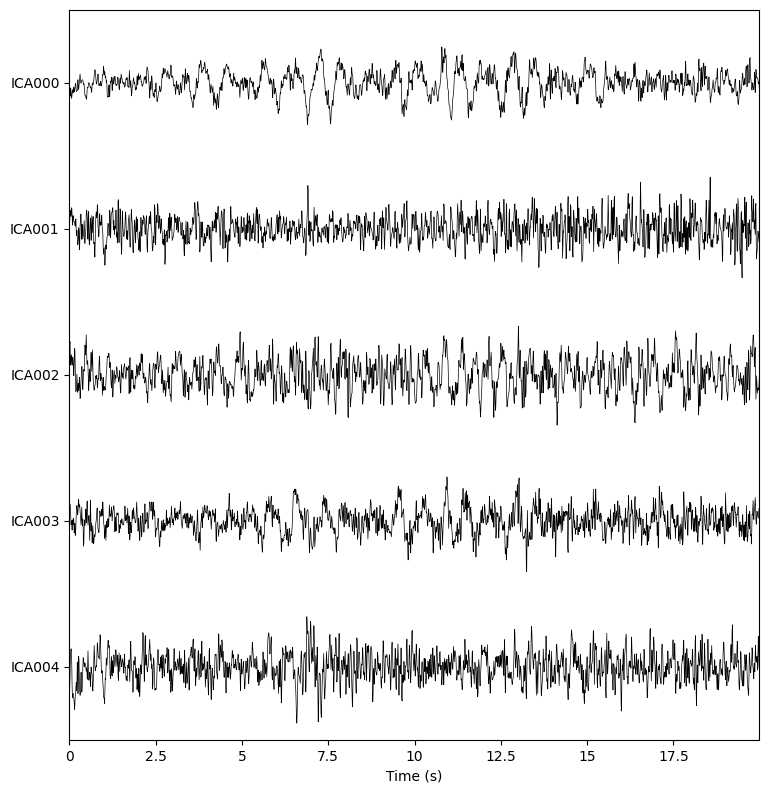

Membaca file: Group A\Atsna\EEG18EDFCase\0000533.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000533.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

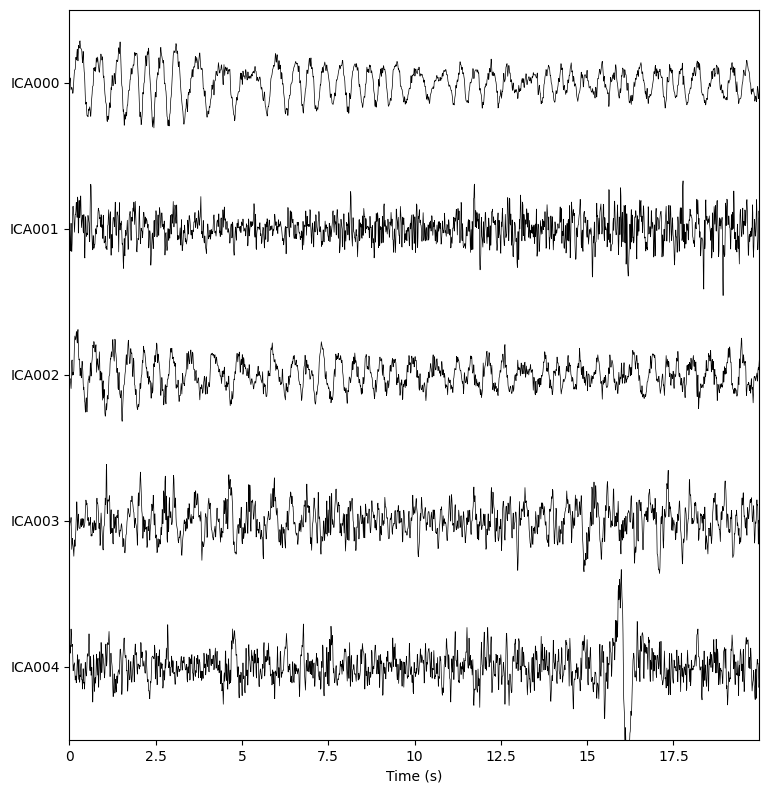

Membaca file: Group A\Atsna\EEG18EDFCase\0000534.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000534.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

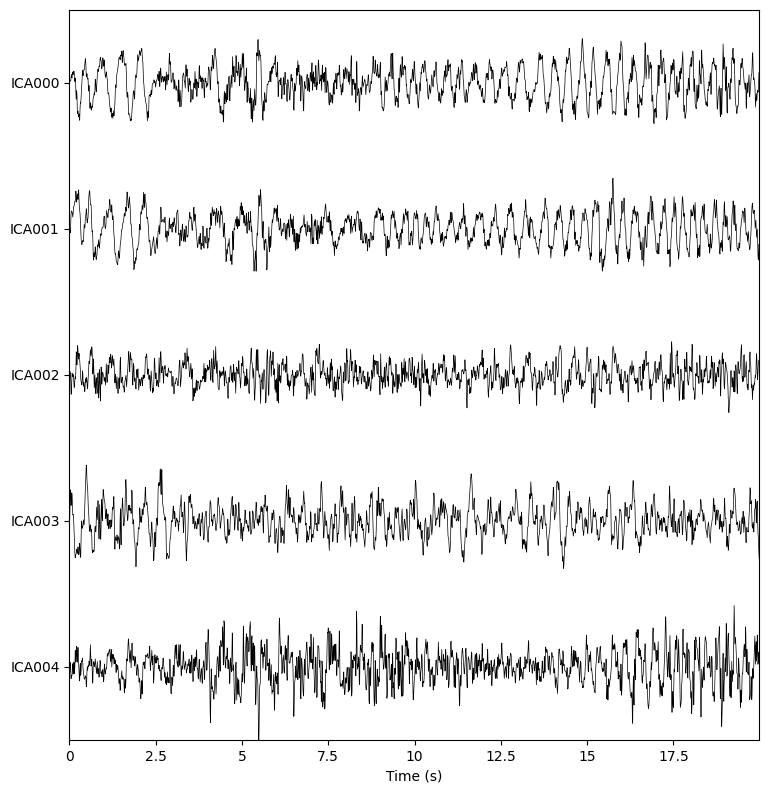

Membaca file: Group A\Atsna\EEG18EDFCase\0000535.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000535.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

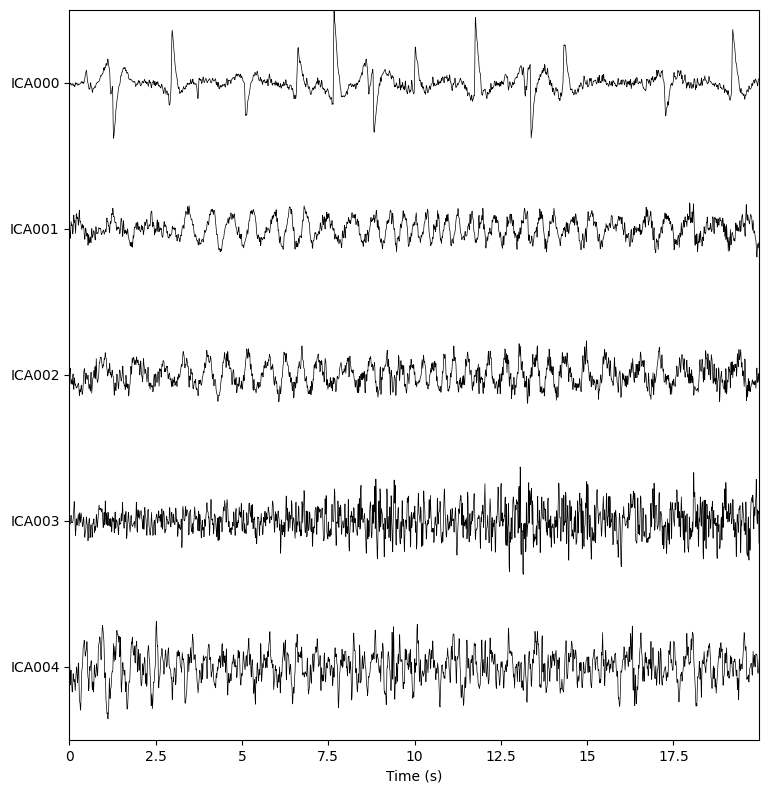

Membaca file: Group A\Atsna\EEG18EDFCase\0000536.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000536.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

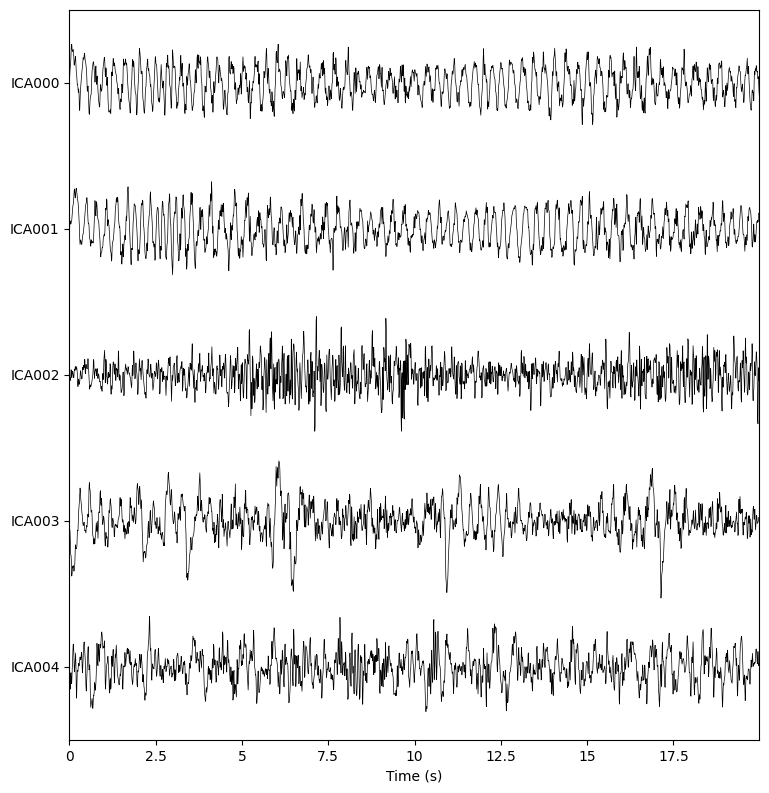

Membaca file: Group A\Atsna\EEG18EDFCase\0000537.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000537.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

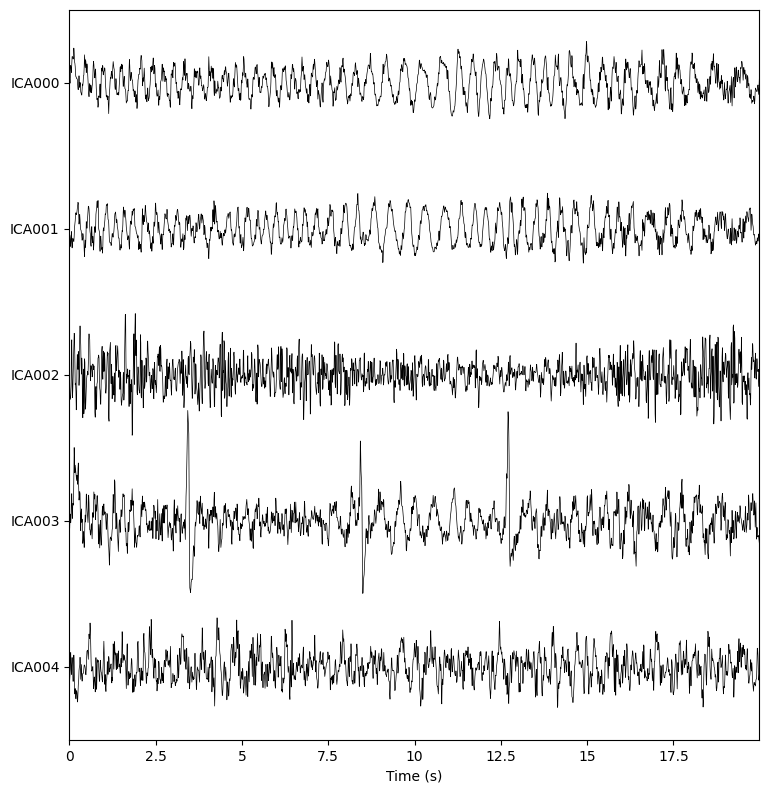

Membaca file: Group A\Atsna\EEG18EDFCase\0000538.EDF...
Extracting EDF parameters from c:\Users\Latifatul Istianah\Documents\OlahData\Group A\Atsna\EEG18EDFCase\0000538.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11999  =      0.000 ...   119.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average

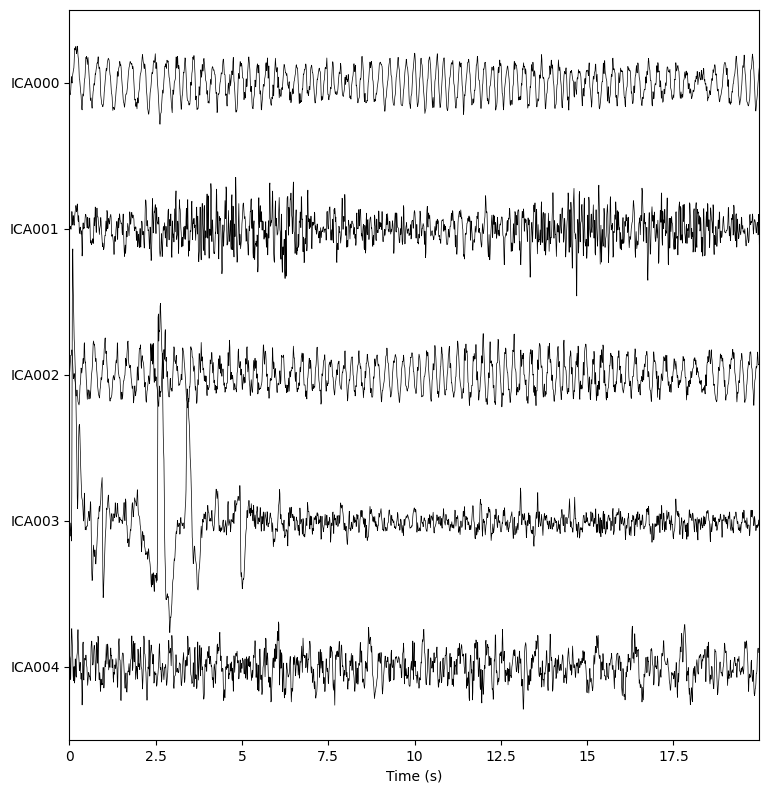

In [1]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# --- Instalasi (Jalankan ini hanya jika pustaka belum terinstal) ---
# Jika Anda belum memiliki MNE, scikit-learn, atau pyedflib, hapus tanda '#' di bawah ini
# dan jalankan di terminal atau command prompt:
# pip install mne scikit-learn pyedflib

# --- Langkah 1: Memuat Data EDF dari Folder ---
# Tentukan jalur ke folder yang berisi file-file EDF.
edf_folder_paths = "Group A\Atsna\EEG18EDFCase"
try:
    # Mencari semua file .EDF di dalam folder
    edf_files = glob.glob(os.path.join(edf_folder_paths, "*.EDF"))
    
    # Memeriksa jika ada file yang ditemukan
    if not edf_files:
        print(f"Tidak ada file EDF ditemukan di: '{edf_folder_paths}'. Mohon periksa kembali jalurnya.")
    else:
        # Looping melalui setiap file EDF yang ditemukan
        for file_path in edf_files:
            # TEST  SECTION
            edf_file_path =  file_path

            try:
                # Membaca data EDF. preload=True memuat data ke memori.
                print(f"Membaca file: {edf_file_path}...")
                raw = mne.io.read_raw_edf(edf_file_path, preload=True)
                raw.set_montage('standard_1020', on_missing='ignore')
                
            except FileNotFoundError:
                print(f"File '{edf_file_path}' tidak ditemukan.")
                print("Membuat data EEG dummy untuk demonstrasi.")
                
                # Membuat data dummy untuk demonstrasi jika file tidak ada
                sfreq = 256  # Frekuensi sampling dalam Hz
                ch_names = ['Fp1', 'Fp2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'O1', 'O2']
                n_channels = len(ch_names)
                duration_s = 60  # Durasi dalam detik
                
                # Membuat sinyal sinus 10 Hz untuk simulasi kedipan mata
                t = np.arange(sfreq * duration_s) / sfreq
                eye_blink = np.sin(2 * np.pi * 10 * t) * 50e-6
                
                # Membuat data acak untuk simulasi aktivitas otak
                eeg_data = np.random.randn(n_channels, len(t)) * 10e-6
                
                # Menambahkan sinyal kedipan mata ke beberapa saluran
                eeg_data[0] += eye_blink  # Menambahkan kedipan mata ke Fp1
                eeg_data[1] += eye_blink  # Menambahkan kedipan mata ke Fp2

                info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
                raw = mne.io.RawArray(eeg_data, info)
                raw.set_montage('standard_1020')

            # --- Langkah 2: Pra-pemrosesan Data ---
            # Pra-pemrosesan penting untuk hasil ICA yang baik.
            # print("Melakukan pra-pemrosesan data...")
            # Menyaring data untuk menghilangkan drift DC dan noise frekuensi tinggi
            raw.filter(1., 40., fir_design='firwin')

            # Menghilangkan rata-rata (average) referensi EEG
            raw.set_eeg_reference('average', projection=True)

            # --- Langkah 3: Menyiapkan dan Menjalankan ICA ---
            # n_components: jumlah komponen independen yang akan diekstraksi
            # random_state: untuk hasil yang dapat direproduksi
            # print("Menjalankan ICA...")
            ica = ICA(n_components=5, random_state=97, method='fastica')
            ica.fit(raw)

            # --- Langkah 4: Visualisasi Hasil ICA ---
            # Memvisualisasikan komponen independen.
            # Komponen yang sering terlihat seperti kedipan mata (eye blink),
            # gerakan mata, atau kontraksi otot adalah artefak.
            # print("Membuat plot komponen ICA. Klik pada plot untuk melihat properti.")
            ica.plot_sources(raw, show_scrollbars=False)

            plt.show() # Tampilkan semua plot
            # print("Selesai. Skrip telah berjalan.")

# Handling error
except FileNotFoundError:
    print(f"Folder '{edf_folder_paths}' tidak ditemukan. Mohon periksa kembali jalurnya.")